In [39]:
import numpy as np
import pandas as pd

# 信息熵  
1948年，香农借用热力学中熵的含义，提出了“信息熵”的概念，用它来描述信源的不确定度。 信息熵是随机变量不确定度的度量，信息熵越大则不确定度越大，反之不确定越小， 可以用下式表示：  
$$
H\left(p_1, p_2, \cdots, p_n\right)=-\sum_{i=1}^n p_i \log _2 p_i
$$  
其中$H\left(p_1, p_2, \cdots, p_n\right)$表示信息熵，$p_{i}$表示第$i$个事件的发生概率。反正信息熵越大，代表越混乱。  
比如现在有两个袋子，每个袋子里面有10个小球。第一个袋子7个红色3个黑色，第二个袋子5个红色5个黑色。现在从里面拿出一个球，这个球可能是红色也可能是黑色。  
分别计算一下信息熵：  
$$
第一个袋子的信息熵 = -\frac{7}{10}*log_{2}\frac{7}{10}-\frac{3}{10}*log_{2}\frac{3}{10}=0.8813 \\
第二个袋子的信息熵 = -\frac{5}{10}*log_{2}\frac{5}{10}-\frac{5}{10}*log_{2}\frac{5}{10}=1.0000
$$  
其实就是如果每种情况发生的可能性越接近一样，那信息熵越大，越大代表越混乱，越混乱代表难以提取有用信息，55开，就是瞎猜，那么这种数据就是无用，因为提取不了什么有价值的而信息，其权重就应该低。

# 熵权法  
根据信息熵的定义，对于某项指标，可以用熵值来判断某个指标的离散程度，其熵值越小，指标的离散程度越大， 该指标对综合评价的影响（即权重）就越大，如果某项指标的值全部相等，则该指标在综合评价中不起作用。

按照信息论基本原理的解释，信息是系统有序程度的一个度量，熵是系统无序程度的一个度量；如果指标的信息熵越小，该指标提供的信息量越大， 在综合评价中所起作用理当越大，权重就应该越高。因此，可利用信息熵这个工具，计算出各个指标的权重，为多指标综合评价提供依据。

计算步骤：

给定 $n$ 个评价对象的 $m$ 个**标准化的指标值** $X_1, X_2, \cdots, X_m$ ，其中 $X_i=x_{i 1}, x_{i 2}, \cdots, x_{i n}$ ，那么 $X_i$ 的熵值为
$$
E_i=-\frac{\sum_{j=1}^n p_{i j} \ln p_{i j}}{\ln (n)}
$$
其中，
$$
p_{i j}=\frac{x_{i j}}{\sum_{j=1}^n x_{i j}}
$$
如果 $p_{i j}=0$ ，则定义 $\lim _{p_{i j} \rightarrow 0} p_{i j} \ln p_{i j}=0$ 。
然后根据各指标的樀值 $E_i$ 确定它们的权重
$$
w_i=\frac{1-E_i}{m-\sum_{i=1}^m E_i}
$$
这样就得到了归一化的各个评价指标的权重 $\boldsymbol{w}=\left(w_1, w_2, \cdots, w_m\right)$ 。

# 案例
- 数据来源：https://spssau.com/index.html

## 读入数据

In [88]:
df = pd.read_excel('spassau_data.xls', usecols=[  '【系统】网购金额_定量'
                                                , '【系统】退货次数_定量'
                                                , '【系统】投诉次数_定量'
                                                , '【系统】网购频率_定量'
                                                
                                                ])

In [89]:
df

,【系统】网购频率_定量,【系统】网购金额_定量,【系统】退货次数_定量,【系统】投诉次数_定量
0,3,2729,4,5
1,3,2958,4,4
2,6,1150,1,2
3,15,4917,5,5
4,2,2741,3,3
...,...,...,...,...
95,3,2545,3,3
96,20,2010,4,3
97,17,4825,5,4
98,4,4315,4,4


# 数据归一化  
图片来源：http://www.huaxuejia.cn/ism/CESAISM/coupling-coordination.php
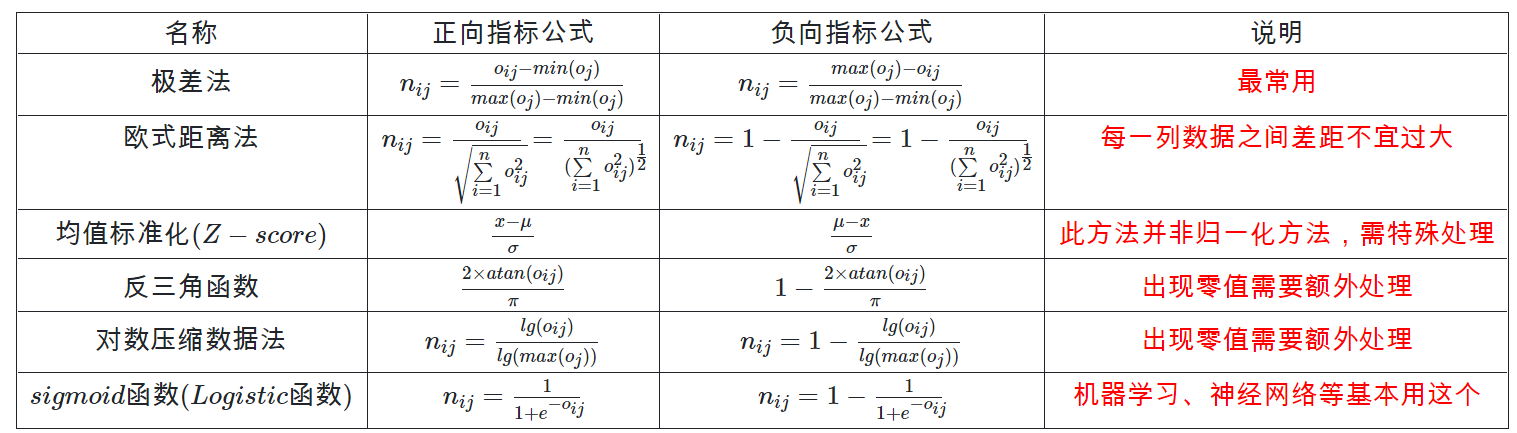
- 注意正向指标还是负向指标

In [90]:
# 假如这里都是正向指标,直接用sklearn里面的MinMaxScaler进行归一化即可
from sklearn.preprocessing import MinMaxScaler

In [91]:
mms = MinMaxScaler()

In [92]:
df2 = pd.DataFrame(mms.fit_transform(df))
df2.columns = df.columns
df2

,【系统】网购频率_定量,【系统】网购金额_定量,【系统】退货次数_定量,【系统】投诉次数_定量
0,0.055556,0.428754,0.75,1.00
1,0.055556,0.487127,0.75,0.75
2,0.222222,0.026255,0.00,0.25
3,0.722222,0.986490,1.00,1.00
4,0.000000,0.431812,0.50,0.50
...,...,...,...,...
95,0.055556,0.381851,0.50,0.50
96,1.000000,0.245475,0.75,0.50
97,0.833333,0.963038,1.00,0.75
98,0.111111,0.833036,0.75,0.75


# $计算p_{ij}$  
- 就是每个值，除以那一列的总和。  
$$
p_{i j}=\frac{x_{i j}}{\sum_{j=1}^n x_{i j}}
$$

In [93]:
df3 = df2.copy()

In [94]:
for col in df3.columns:
    df3[col] = df3[col] / df3[col].sum()

In [95]:
df3

,【系统】网购频率_定量,【系统】网购金额_定量,【系统】退货次数_定量,【系统】投诉次数_定量
0,0.001264,0.009203,0.012397,0.017094
1,0.001264,0.010456,0.012397,0.012821
2,0.005057,0.000564,0.000000,0.004274
3,0.016435,0.021175,0.016529,0.017094
4,0.000000,0.009269,0.008264,0.008547
...,...,...,...,...
95,0.001264,0.008197,0.008264,0.008547
96,0.022756,0.005269,0.012397,0.008547
97,0.018963,0.020672,0.016529,0.012821
98,0.002528,0.017881,0.012397,0.012821


## $每个指标的E_{i}$  
$$
E_i=-\frac{\sum_{j=1}^n p_{i j} \ln p_{i j}}{\ln (n)}
$$

In [96]:
# 自然对数是np.e
np.pi,np.e

(3.141592653589793, 2.718281828459045)

In [97]:
# np.log就是ln
np.log(np.e)

1.0

In [98]:
def func(pij):
    if pij == 0:
        return 0
    else:
        return pij*np.log(pij)

In [99]:
# 计算某个指标的Ei
(-1) * df3['【系统】网购频率_定量'].apply(func).sum() / np.log(df3.shape[0])

0.934426270830803

In [100]:
L = []
for col in df3.columns:
    Ei = (-1) * df3[col].apply(func).sum() / np.log(df3.shape[0])
    L.append( [col, Ei] )

In [101]:
L

[['【系统】网购频率_定量', 0.934426270830803],
 ['【系统】网购金额_定量', 0.9505626550459141],
 ['【系统】退货次数_定量', 0.9755319634653258],
 ['【系统】投诉次数_定量', 0.9770730736959125]]

In [102]:
df4 = pd.DataFrame(L)
df4.columns = ['指标', '熵值']
df4

,指标,熵值
0,【系统】网购频率_定量,0.934426
1,【系统】网购金额_定量,0.950563
2,【系统】退货次数_定量,0.975532
3,【系统】投诉次数_定量,0.977073


# 计算每个指标的权重$w_{i}$  
$$
w_i=\frac{1-E_i}{m-\sum_{i=1}^m E_i},m是指标个数
$$

In [103]:
m = 4

In [104]:
 df4['权重'] = ( 1-df4['熵值'] ) / (4-df4['熵值'].sum())

In [105]:
df4

,指标,熵值,权重
0,【系统】网购频率_定量,0.934426,0.403764
1,【系统】网购金额_定量,0.950563,0.304406
2,【系统】退货次数_定量,0.975532,0.150660
3,【系统】投诉次数_定量,0.977073,0.141170


In [106]:
df4['权重'].sum()

0.9999999999999993

# 与SPASSAU结果进行对比  
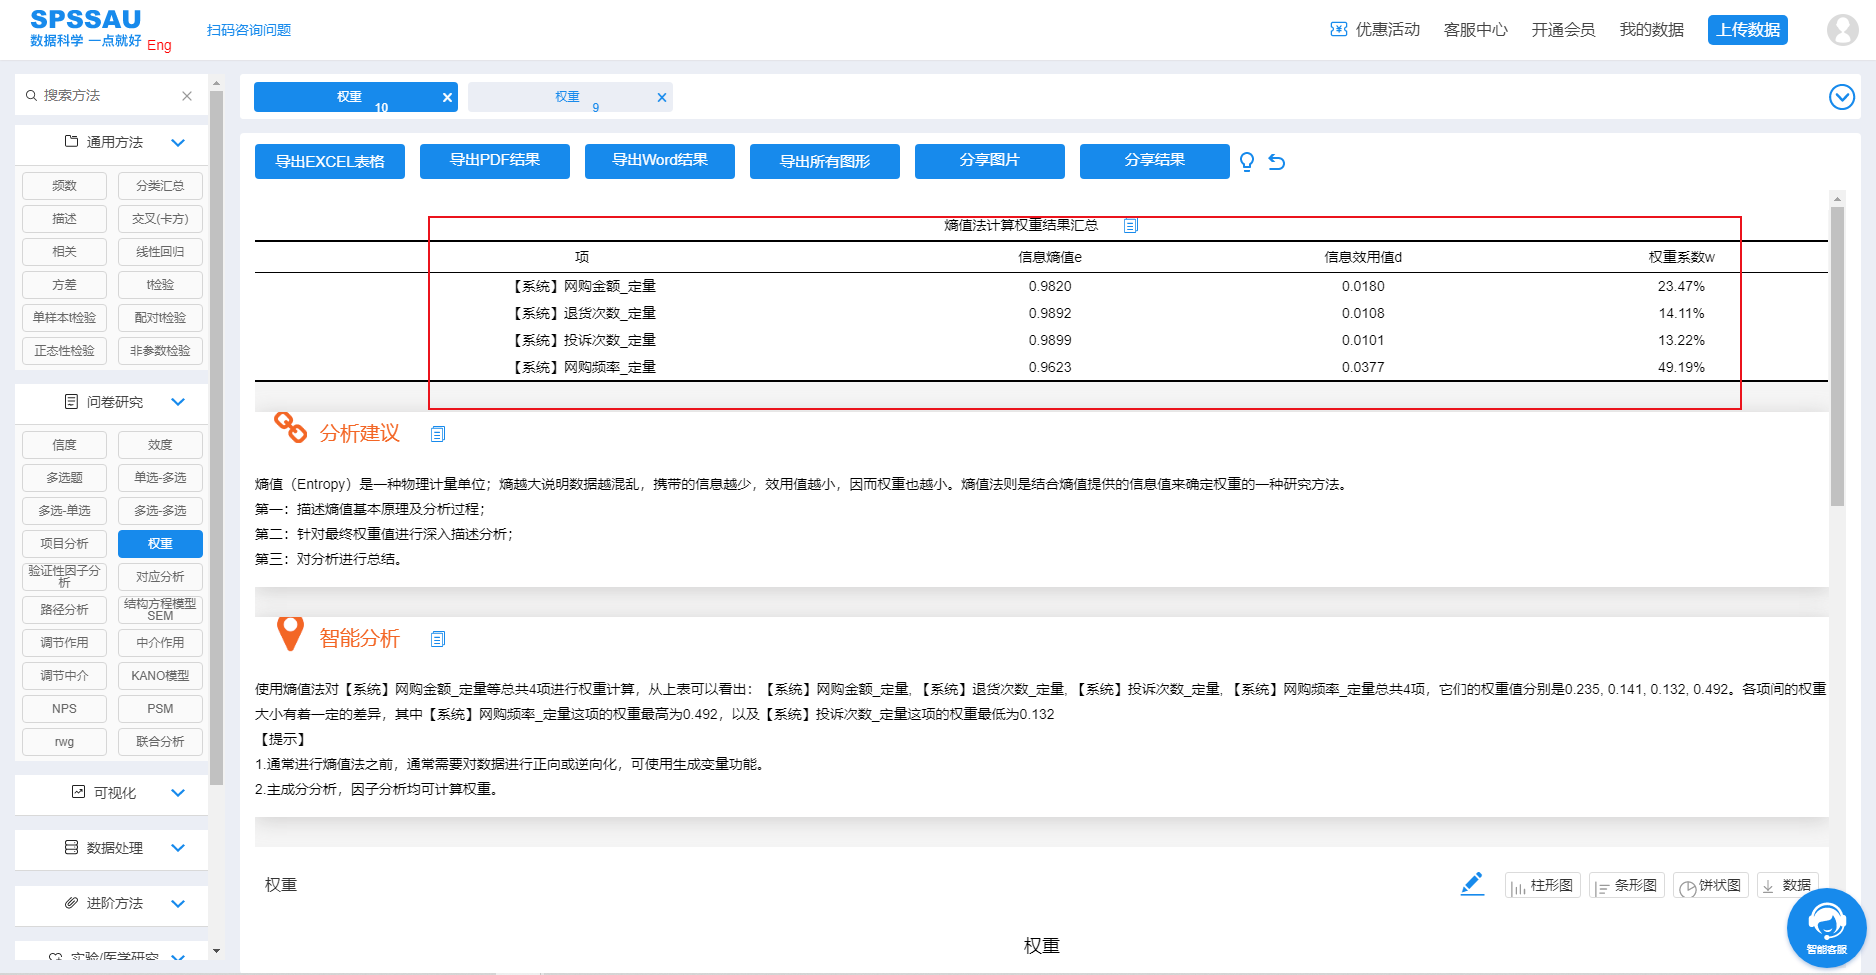